In [26]:
import pandas as pd
data = pd.read_csv('/content/assino2.2.csv')
data=data.iloc[:,0:2]
data.head(100)

,Number_of_Casualties,Weather_Conditions
0,1,2
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
95,1,1
96,1,1
97,1,1
98,2,1


In [28]:
duplicates_casualties = data[data['Number_of_Casualties'].duplicated()]
duplicates_Weather_Conditions = data[data['Weather_Conditions'].duplicated()]
print(duplicates_casualties)
print(duplicates_Weather_Conditions)

         Number_of_Casualties  Weather_Conditions
1                           1                   1
2                           1                   1
3                           1                   1
4                           1                   1
5                           1                   2
...                       ...                 ...
1048570                     2                   1
1048571                     1                   1
1048572                     1                   1
1048573                     1                   1
1048574                     1                   3

[1048534 rows x 2 columns]
         Number_of_Casualties  Weather_Conditions
2                           1                   1
3                           1                   1
4                           1                   1
5                           1                   2
6                           1                   1
...                       ...                 ...
1048570               

In [27]:
unique_values = data.value_counts()
print(unique_values)

Number_of_Casualties  Weather_Conditions
1                     1                     635781
2                     1                     134881
1                     2                      91544
3                     1                      38072
2                     2                      23133
                                             ...  
10                    5                          1
                      4                          1
21                    2                          1
                      9                          1
68                    2                          1
Length: 146, dtype: int64


In [29]:
null = data.isnull().sum()
print(null)

Number_of_Casualties    0
Weather_Conditions      0
dtype: int64


In [30]:
data['Weather_Conditions'].replace(0)

0          2
1          1
2          1
3          1
4          1
          ..
1048570    1
1048571    1
1048572    1
1048573    1
1048574    3
Name: Weather_Conditions, Length: 1048575, dtype: int64

In [31]:
summary = data.describe()
print(data.info())
print(summary)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 2 columns):
 #   Column                Non-Null Count    Dtype
---  ------                --------------    -----
 0   Number_of_Casualties  1048575 non-null  int64
 1   Weather_Conditions    1048575 non-null  int64
dtypes: int64(2)
memory usage: 16.0 MB
None
       Number_of_Casualties  Weather_Conditions
count          1.048575e+06        1.048575e+06
mean           1.359930e+00        1.610068e+00
std            8.223645e-01        1.700981e+00
min            1.000000e+00       -1.000000e+00
25%            1.000000e+00        1.000000e+00
50%            1.000000e+00        1.000000e+00
75%            1.000000e+00        1.000000e+00
max            6.800000e+01        9.000000e+00


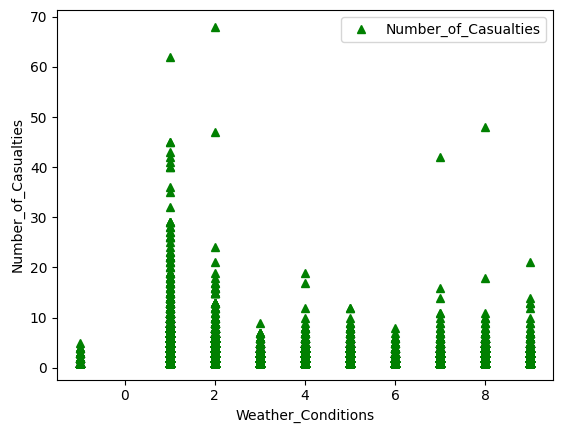

In [32]:
import matplotlib.pyplot as plt
data = data.loc[:,['Weather_Conditions','Number_of_Casualties']]
data.plot(x='Weather_Conditions',y='Number_of_Casualties',style='^', color='green')
plt.xlabel('Weather_Conditions')
plt.ylabel('Number_of_Casualties')
plt.show()

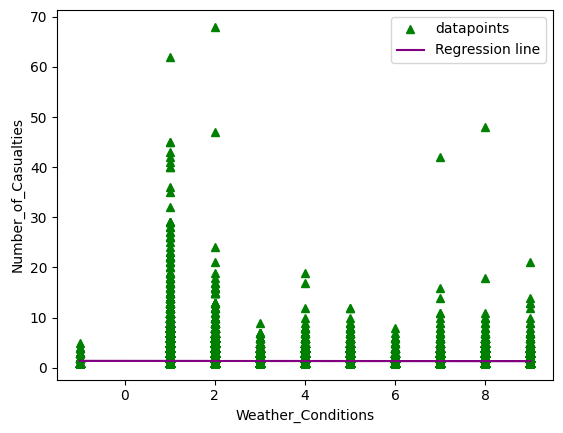

In [33]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
x = data[['Weather_Conditions']]
y = data[['Number_of_Casualties']]
regressor.fit(x,y)
data.plot(x='Weather_Conditions',y='Number_of_Casualties',style='^', color='green',label='datapoints')
plt.plot(x, regressor.predict(x), color='purple', label='Regression line')
plt.xlabel('Weather_Conditions')
plt.ylabel('Number_of_Casualties')
plt.legend()
plt.show()

In [34]:
from sklearn.model_selection import train_test_split
x = pd.DataFrame(data['Weather_Conditions'])
y = pd.DataFrame(data['Number_of_Casualties'])
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=1)
regressor = LinearRegression()
regressor.fit(x_train,y_train)
y_pred = regressor.predict(x_test)
y_test


,Number_of_Casualties
1045953,1
358409,1
875012,1
555046,1
272972,1
...,...
181305,1
672605,1
718823,1
1006146,2


In [42]:

from sklearn import metrics
import numpy as np
ma = metrics.mean_absolute_error(y_test, y_pred)
ms = metrics.mean_squared_error(y_test, y_pred)
rms = np.sqrt(ms)
print("MA", ma)
print("MS", ms)
print("RMS", rms)

MA 0.5548675000027108
MS 0.680095020670389
RMS 0.8246787378551657


In [35]:
import joblib
import pickle
model = LinearRegression()
model.fit(x,y)
joblib.dump(model, 'assigno2.pkl')
with open('assign02.pkl', 'wb') as file:
  pickle.dump(model, file)

In [40]:
import numpy as np
new_w = np.array([10,20,30,40,50]).reshape(-1,1)
model = joblib.load('assigno2.pkl')
predictions = model.predict(new_w)
new_data=pd.DataFrame({'w':new_w.flatten(), 'Predicted_w': predictions.flatten()})
print(new_data)


    w  Predicted_w
0  10     1.335871
1  20     1.307194
2  30     1.278517
3  40     1.249840
4  50     1.221164


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
